In [2]:
%pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
import json


# carpeta_compartida_id = '1rD1FqADztO3bhobxEev8TJrXVkd9pyX9'

# ruta_carpeta_compartida = '/content/'

# drive.mount(ruta_carpeta_compartida, force_remount=True)

# ruta_json = ruta_carpeta_compartida + '/tokenizadas.json'

In [4]:
json_data = []
##### SUBIR EL ARCHIVO tokenizasdas.json desde el drive hacia el colab
with open("./tokenizadas.json", "r") as archivo:
    json_data = json.load(archivo)

print(json_data[0])

['reglamento', 'ejecución', 'ue', 'comisión']


In [5]:
from gensim.models import FastText
from gensim.test.utils import common_texts
from gensim.models.word2vec import Word2Vec
import multiprocessing
sentences = json_data

# word2vec con 300 frases
wv_model1 = Word2Vec(sentences = sentences[0:300], vector_size = 300, window = 5, min_count = 1, workers = 4)


In [22]:
wv_model1.wv.most_similar("reglamento")

[('aplicación', 0.24314352869987488),
 ('carbono', 0.2237423062324524),
 ('acceso', 0.22001168131828308),
 ('traduce', 0.1999157816171646),
 ('permiten', 0.18761533498764038),
 ('notificar', 0.16703298687934875),
 ('sustantivas', 0.15867483615875244),
 ('aelc', 0.15251930058002472),
 ('actualidad', 0.1524025797843933),
 ('situación', 0.15118108689785004)]

In [6]:
# word2vec con 1M frases
wv_model2 = Word2Vec(sentences = sentences[0:1000000], vector_size = 300, window = 5, min_count = 1, workers = 4)


In [23]:
wv_model2.wv.most_similar("reglamento")

[('directiva', 0.64842689037323),
 ('decisión', 0.6320028901100159),
 ('apartado', 0.5003248453140259),
 ('reglamentos', 0.48006176948547363),
 ('apartados', 0.4552935063838959),
 ('artículo', 0.4434039890766144),
 ('párrafo', 0.4281364679336548),
 ('recomendación', 0.40016475319862366),
 ('bis', 0.39421454071998596),
 ('tratado', 0.38549330830574036)]

In [21]:
# word2vec con todas las frases (3.17M)
wv_model3 = Word2Vec(sentences = sentences, vector_size = 300, window = 5, min_count = 1, workers = 4)
wv_model3.wv.most_similar("reglamento")

[('directiva', 0.7040601968765259),
 ('decisión', 0.6652002930641174),
 ('reglamentos', 0.5298101305961609),
 ('apartado', 0.5222047567367554),
 ('artículo', 0.4822925627231598),
 ('apartados', 0.47278329730033875),
 ('párrafo', 0.45239803194999695),
 ('bis', 0.4310138523578644),
 ('tratado', 0.41660064458847046),
 ('recomendación', 0.3958141803741455)]

In [16]:
wv_model1.wv.most_similar("reglamento")

[('aplicación', 0.24314352869987488),
 ('carbono', 0.2237423062324524),
 ('acceso', 0.22001168131828308),
 ('traduce', 0.1999157816171646),
 ('permiten', 0.18761533498764038),
 ('notificar', 0.16703298687934875),
 ('sustantivas', 0.15867483615875244),
 ('aelc', 0.15251930058002472),
 ('actualidad', 0.1524025797843933),
 ('situación', 0.15118108689785004)]

In [ ]:

#Guardar un .txt con las palabras y el vector
wv_model3.wv.save_word2vec_format('text_word2vec_trujillo_tovar_ospitia.txt',binary=False)


In [16]:
#fastext con 300 frases
ft_model1 = FastText(sentences = sentences[0:300], vector_size = 300, window = 5, min_count = 1, workers = 8)
ft_model1.wv.most_similar("reglamento")

[('reglamentos', 0.9770632982254028),
 ('parlamento', 0.9320387244224548),
 ('creación', 0.9230615496635437),
 ('financiación', 0.9215353727340698),
 ('tentación', 0.9211490750312805),
 ('recuperación', 0.9209727644920349),
 ('aplicación', 0.9209174513816833),
 ('realización', 0.9204316139221191),
 ('situación', 0.9200308918952942),
 ('recientemente', 0.9193529486656189)]

In [19]:
#fastext con 1M de frases
ft_model2 = FastText(sentences = sentences[0:1000000], vector_size = 300, window = 5, min_count = 1, workers = 4)
ft_model2.wv.most_similar("reglamento")

[('yreglamento', 0.9942218065261841),
 ('regolamento', 0.9408247470855713),
 ('reglamente', 0.9297002553939819),
 ('reglamentada', 0.9231926202774048),
 ('regulamento', 0.9200482964515686),
 ('filamento', 0.9077208638191223),
 ('regolament', 0.8948385715484619),
 ('reglamentario', 0.8943285346031189),
 ('reglamentar', 0.8842102885246277),
 ('apartamento', 0.873670220375061)]

In [20]:
#fastext con todas las frases
ft_model3 = FastText(sentences = sentences, vector_size = 300, window = 5, min_count = 1, workers = 6)
ft_model3.wv.most_similar("escritorio")

[('escritor', 0.8295446634292603),
 ('escrito', 0.814297080039978),
 ('escrito(1', 0.7970248460769653),
 ('escrito(-a', 0.7949172258377075),
 ('escritorios', 0.7927300333976746),
 ('dormitorio', 0.7592397928237915),
 ('adscrito', 0.7216739654541016),
 ('notorio', 0.7213538289070129),
 ('repositorio', 0.7098346948623657),
 ('predatorio', 0.6993255019187927)]

In [21]:
#Guardar un .txt con las palabras y el vector (fasttext)
ft_model3.wv.save_word2vec_format('text_fasttext_trujillo_tovar_ospitia.txt',binary=False)

In [ ]:

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
## visualizar

def visualizar_tsne(modelo, dim, perplexity=30):
    # Obtener vectores de palabras y palabras
    vectores = modelo.wv.vectors
    palabras = modelo.wv.index_to_key

    # Aplicar t-SNE para reducción de dimensionalidad a 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    vectores_2d = tsne.fit_transform(vectores)

    # Visualizar todas las palabras en el plano cartesiano
    plt.figure(figsize=(10, 8))
    for palabra, (x, y) in zip(palabras, vectores_2d):
        plt.scatter(x, y)
        plt.text(x, y, palabra, fontsize=9)
    plt.title(f'Visualización t-SNE - Dimensión {dim}')
    plt.show()

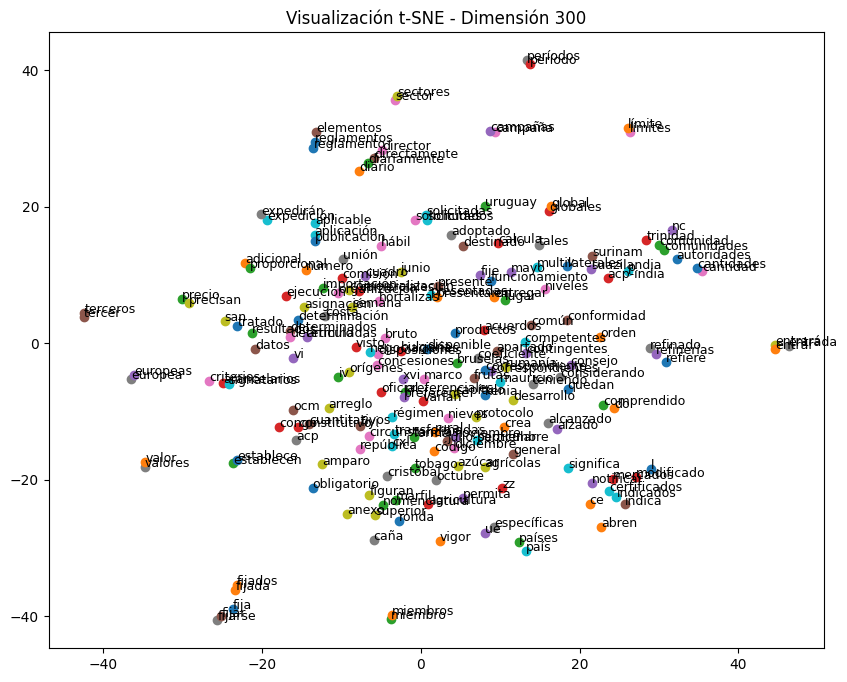

In [ ]:
ft_model_view = FastText(sentences = sentences[0:100], vector_size = 300, window = 5, min_count = 1, workers = 12)
visualizar_tsne(ft_model_view, 300, perplexity=5 )

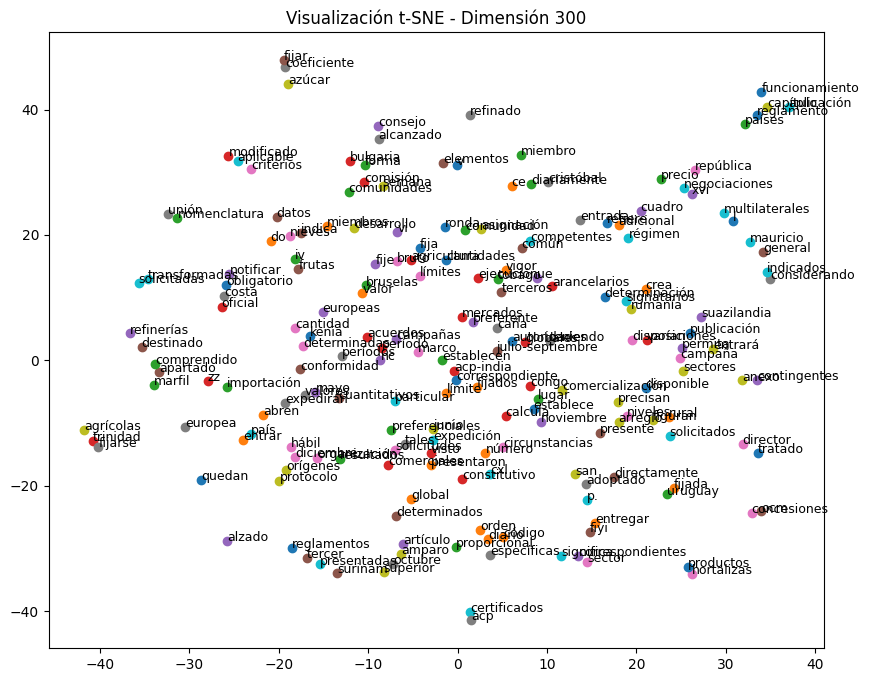

In [ ]:
wv_model_view = Word2Vec(sentences = sentences[0:100], vector_size = 300, window = 5, min_count = 1, workers = 12)
visualizar_tsne(wv_model_view, 300, perplexity=5 )